In [24]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


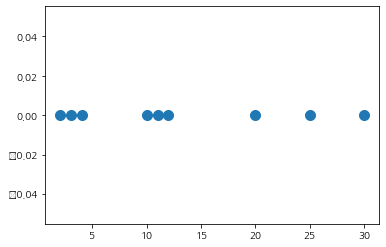

In [25]:
X=np.array([[2,0],[3,0],[4,0],[10,0],[11,0],[12,0],[20,0],[25,0],[30,0]])

plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [26]:
# K-means 1회차 k=2, m1=3, m2=4
model1 = KMeans(n_clusters=2, init=np.array([[3,0],[4,0]]), n_init=1, 
               max_iter=1, random_state=1).fit(X)

c0, c1 = model1.cluster_centers_

c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

In [27]:
model1.score(X)

-372.75

In [28]:
model1.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 1])

In [29]:
def kmeans_df(model, c0, c1):
    df=pd.DataFrame(np.hstack([X,
                               np.linalg.norm(X-c0, axis=1)[:, np.newaxis],
                               np.linalg.norm(X-c1, axis=1)[:, np.newaxis],
                               model.labels_[:, np.newaxis]]),
                   columns=['x좌표','y좌표','거리0','거리1','군집번호'])
    return df

In [30]:
kmeans_df(model1, c0, c1)

,x좌표,y좌표,거리0,거리1,군집번호
0,2.0,0.0,0.5,14.0,0.0
1,3.0,0.0,0.5,13.0,0.0
2,4.0,0.0,1.5,12.0,0.0
3,10.0,0.0,7.5,6.0,1.0
4,11.0,0.0,8.5,5.0,1.0
5,12.0,0.0,9.5,4.0,1.0
6,20.0,0.0,17.5,4.0,1.0
7,25.0,0.0,22.5,9.0,1.0
8,30.0,0.0,27.5,14.0,1.0


In [33]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_==0,0],
                X[model.labels_==0,1], s=100, c='r', marker='v')
    plt.scatter(X[model.labels_==1,0],
                X[model.labels_==1,1], s=100, c='b', marker='^')
    plt.scatter(c0[0], c0[1], s=200, c='r')
    plt.scatter(c1[0], c1[1], s=200, c='b')
    plt.show()

C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


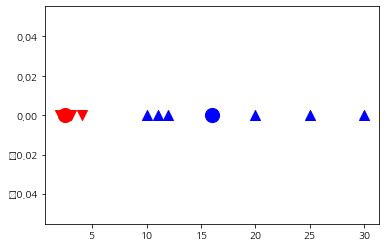

In [34]:
plot_cluster(model1, c0, c1)

In [37]:
# K-means 2회차 k=2, m1=2.5, m2=16
model1 = KMeans(n_clusters=2, init=np.array([[2.5,0],[16,0]]), n_init=1, 
               max_iter=1, random_state=1).fit(X)

c0, c1 = model1.cluster_centers_

c0, c1

(array([3., 0.]), array([18.,  0.]))

C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


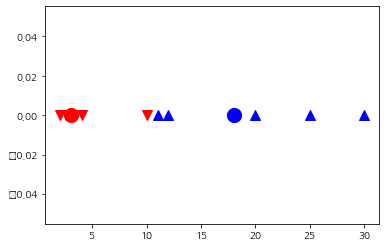

In [38]:
plot_cluster(model1, c0, c1)

In [39]:
# K-means 3회차 k=2, m1=3, m2=18
model1 = KMeans(n_clusters=2, init=np.array([[3,0],[18,0]]), n_init=1, 
               max_iter=1, random_state=1).fit(X)

c0, c1 = model1.cluster_centers_

c0, c1

(array([4.75, 0.  ]), array([19.6,  0. ]))

C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


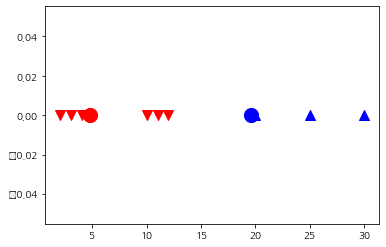

In [40]:
plot_cluster(model1, c0, c1)

In [41]:
# K-means 4회차 k=2, m1=4.75, m2=19.6
model1 = KMeans(n_clusters=2, init=np.array([[4.75,0],[19.6,0]]), n_init=1, 
               max_iter=1, random_state=1).fit(X)

c0, c1 = model1.cluster_centers_

c0, c1

(array([7., 0.]), array([25.,  0.]))

C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


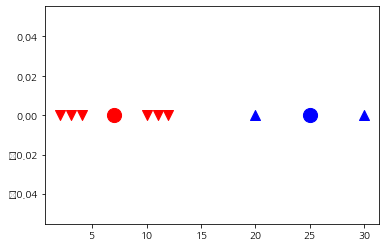

In [42]:
plot_cluster(model1, c0, c1)

In [44]:
model1 = KMeans(n_clusters=2, init='random', n_init=1, 
               max_iter=999999, random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([25.,  0.]), array([7., 0.]))

In [47]:
model1 = KMeans(n_clusters=2, init='k-means++', n_init=100, 
               max_iter=999999, random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([7., 0.]), array([25.,  0.]))